In [1]:
# Step 0. Load libraries and custom functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1. Load dataset
# 1.1 Read csv and show basic info
df_raw = pd.read_csv('../data/ventas.csv', engine='python', encoding='latin-1')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             10879 non-null  object 
 1   Cdigo            10879 non-null  int64  
 2   Descripcin       10879 non-null  object 
 3   Precio Unitario   10879 non-null  float64
 4   Costo Unitario    10879 non-null  float64
 5   Cantidad Vendida  10879 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 510.1+ KB


In [3]:
# 1.2 Show a sample of the dataset
df_raw.sample(10, random_state=2024)

,Fecha,Cdigo,Descripcin,Precio Unitario,Costo Unitario,Cantidad Vendida
10849,2024-06,10121151,BIPACK NOSOTRAS 2 INV DEO 10UN,18.2,17.98,5.0
3320,2023-05,100714,HUEVO ROLON M.CORTADO 12U,12.9,10.00,9.0
1150,2022-42,10108320,CHOCOLATE SUBLIME CLASICO 100GR,12.5,12.00,1.0
7147,2022-43,10000095,GASEOSA PEPSI 500ML,3.5,3.22,28.0
6449,2023-25,10022018,PAPEL HIG CONFORT 12UN,74.1,63.71,5.0
4029,2022-19,10083638,CERVEZA HUARI MIEL 330ML,11.0,8.73,29.0
3289,2023-02,100714,HUEVO ROLON M.CORTADO 12U,12.9,10.00,6.0
4391,2023-04,10083638,CERVEZA HUARI MIEL 330ML,11.0,8.73,53.0
7573,2023-37,10000095,GASEOSA PEPSI 500ML,3.5,3.22,68.0
4741,2023-40,10083638,CERVEZA HUARI MIEL 330ML,10.9,8.73,26.0


In [4]:
# Step 2. Preprocess data to format columns
# 2.1 Create a copy of the raw data
df_interim = df_raw.reset_index(drop=True).copy()

In [5]:
# 2.2 Rename columns
df_interim = df_interim.rename(columns={df_interim.columns[1]:'Codigo',
                                        df_interim.columns[2]:'Descripcion',
                                        df_interim.columns[3]:'Precio_Unitario',
                                        df_interim.columns[4]:'Costo_Unitario',
                                        df_interim.columns[5]:'Cantidad_Vendida'})
df_interim.columns

Index(['Fecha', 'Codigo', 'Descripcion', 'Precio_Unitario', 'Costo_Unitario',
       'Cantidad_Vendida'],
      dtype='object')

In [6]:
# 2.3 Format dates
df_interim['Fecha_Formato'] = pd.to_datetime(df_interim['Fecha'] + '-1', format='%Y-%W-%w')
df_interim.sample(5, random_state=2024)

,Fecha,Codigo,Descripcion,Precio_Unitario,Costo_Unitario,Cantidad_Vendida,Fecha_Formato
10849,2024-06,10121151,BIPACK NOSOTRAS 2 INV DEO 10UN,18.2,17.98,5.0,2024-02-05
3320,2023-05,100714,HUEVO ROLON M.CORTADO 12U,12.9,10.00,9.0,2023-01-30
1150,2022-42,10108320,CHOCOLATE SUBLIME CLASICO 100GR,12.5,12.00,1.0,2022-10-17
7147,2022-43,10000095,GASEOSA PEPSI 500ML,3.5,3.22,28.0,2022-10-24
6449,2023-25,10022018,PAPEL HIG CONFORT 12UN,74.1,63.71,5.0,2023-06-19


In [7]:
# 2.4 Format code
df_interim['Codigo'] = df_interim['Codigo'].astype(str)
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879 entries, 0 to 10878
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             10879 non-null  object        
 1   Codigo            10879 non-null  object        
 2   Descripcion       10879 non-null  object        
 3   Precio_Unitario   10879 non-null  float64       
 4   Costo_Unitario    10879 non-null  float64       
 5   Cantidad_Vendida  10879 non-null  float64       
 6   Fecha_Formato     10879 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 595.1+ KB


In [8]:
# 2.5 Create profit column
df_interim['Ganancia'] = (df_interim['Precio_Unitario'] - df_interim['Costo_Unitario']) * df_interim['Cantidad_Vendida']
df_interim.sample(5, random_state=2024)

,Fecha,Codigo,Descripcion,Precio_Unitario,Costo_Unitario,Cantidad_Vendida,Fecha_Formato,Ganancia
10849,2024-06,10121151,BIPACK NOSOTRAS 2 INV DEO 10UN,18.2,17.98,5.0,2024-02-05,1.10
3320,2023-05,100714,HUEVO ROLON M.CORTADO 12U,12.9,10.00,9.0,2023-01-30,26.10
1150,2022-42,10108320,CHOCOLATE SUBLIME CLASICO 100GR,12.5,12.00,1.0,2022-10-17,0.50
7147,2022-43,10000095,GASEOSA PEPSI 500ML,3.5,3.22,28.0,2022-10-24,7.84
6449,2023-25,10022018,PAPEL HIG CONFORT 12UN,74.1,63.71,5.0,2023-06-19,51.95


In [9]:
# 2.6 Set formatted date as index
df_interim = df_interim.set_index(['Fecha_Formato'])

In [10]:
# 2.7 Save the dataframe for analysis purposes
df = df_interim.copy()

In [11]:
# Step 3. Exploratory Data Analysis
# 3.1 Get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10879 entries, 2022-01-03 to 2024-02-19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             10879 non-null  object 
 1   Codigo            10879 non-null  object 
 2   Descripcion       10879 non-null  object 
 3   Precio_Unitario   10879 non-null  float64
 4   Costo_Unitario    10879 non-null  float64
 5   Cantidad_Vendida  10879 non-null  float64
 6   Ganancia          10879 non-null  float64
dtypes: float64(4), object(3)
memory usage: 679.9+ KB


In [12]:
# 3.2 Get basic statistics
df.describe(include='all')

,Fecha,Codigo,Descripcion,Precio_Unitario,Costo_Unitario,Cantidad_Vendida,Ganancia
count,10879,10879,10879,10879.000000,10879.000000,10879.000000,10879.000000
unique,112,12,12,NaN,NaN,NaN,NaN
top,2022-10,100714,HUEVO ROLON M.CORTADO 12U,NaN,NaN,NaN,NaN
freq,112,1060,1060,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,15.945583,14.172863,17.850344,15.555206
std,NaN,NaN,NaN,19.302433,17.898202,24.058339,50.458713
min,NaN,NaN,NaN,1.400000,1.400000,0.440000,-1588.150000
25%,NaN,NaN,NaN,4.000000,3.220000,4.000000,3.000000
50%,NaN,NaN,NaN,10.900000,8.730000,10.000000,9.360000
75%,NaN,NaN,NaN,15.900000,12.200000,22.000000,24.000000


In [13]:
# 3.3 Get a sample
df.sample(5, random_state=2024)

,Fecha,Codigo,Descripcion,Precio_Unitario,Costo_Unitario,Cantidad_Vendida,Ganancia
Fecha_Formato,,,,,,,
2024-02-05,2024-06,10121151,BIPACK NOSOTRAS 2 INV DEO 10UN,18.2,17.98,5.0,1.10
2023-01-30,2023-05,100714,HUEVO ROLON M.CORTADO 12U,12.9,10.00,9.0,26.10
2022-10-17,2022-42,10108320,CHOCOLATE SUBLIME CLASICO 100GR,12.5,12.00,1.0,0.50
2022-10-24,2022-43,10000095,GASEOSA PEPSI 500ML,3.5,3.22,28.0,7.84
2023-06-19,2023-25,10022018,PAPEL HIG CONFORT 12UN,74.1,63.71,5.0,51.95


In [17]:
# 3.4 Show the products sold by quantity, by year
df.resample('YE')['Cantidad_Vendida'].sum()

Fecha_Formato
2022-12-31    90846.37
2023-12-31    92902.69
2024-12-31    10444.83
Freq: YE-DEC, Name: Cantidad_Vendida, dtype: float64

In [18]:
# 3.4 Show the products sold by revenue, by year
df.resample('YE')['Ganancia'].sum()

Fecha_Formato
2022-12-31    58336.7880
2023-12-31    99584.3815
2024-12-31    11303.9175
Freq: YE-DEC, Name: Ganancia, dtype: float64

In [27]:
# 3.5 Show the quantity of products sold, by year
df.resample('YE')['Cantidad_Vendida'].sum()

Fecha_Formato
2022-12-31    90846.37
2023-12-31    92902.69
2024-12-31    10444.83
Freq: YE-DEC, Name: Cantidad_Vendida, dtype: float64

In [25]:
# 3.6 Show the detail of products revenue, by year 
df.groupby([df.index.year, 'Descripcion'])['Ganancia'].agg(['sum'])

sum
Fecha_Formato Descripcion                                
2022          ALIM. BEB.DE SOYA BANA            4194.0000
              BIPACK NOSOTRAS  2 INV DEO 10UN  -8719.2400
              CERVEZA HUARI MIEL 330ML         44338.5100
              CHOCOLATE SUBLIME CLASICO 100GR   3220.5500
              GASEOSA PEPSI 500ML               6455.9000
              HUEVO ROLON M.CORTADO 12U         6188.7000
              JUGO PIL MANZ CLASIC TETR         8615.9500
              JUGO PIL PINA ETRA 150ML          5611.9000
              LECHE EVAPORADA B B UHT 400G     -4647.9000
              NESTLE CLASSIC MILK 80G           3940.3000
              PAPEL HIG CONFORT 12UN          -15799.1100
              PORK BELLY CONGELADO SOFI         4937.2280
2023          ALIM. BEB.DE SOYA BANA            4787.5000
              BIPACK NOSOTRAS  2 INV DEO 10UN  -7834.1700
              CERVEZA HUARI MIEL 330ML         27700.5600
              CHOCOLATE SUBLIME CLASICO 100GR   4657.7000
              GASEOSA PEPSI 500ML               8216.0800
              HUEVO ROLON M.CORTADO 12U        33388.3000
              JUGO PIL MANZ CLASIC TETR         7914.4000
              JUGO PIL PINA ETRA 150ML          5645.1000
              LECHE EVAPORADA B B UHT 400G      1316.0000
              NESTLE CLASSIC MILK 80G           3315.1000
              PAPEL HIG CONFORT 12UN            5746.7400
              PORK BELLY CONGELADO SOFI         4731.0715
2024          ALIM. BEB.DE SOYA BANA            1200.6000
              BIPACK NOSOTRAS  2 INV DEO 10UN     55.7000
              CERVEZA HUARI MIEL 330ML           674.8700
              CHOCOLATE SUBLIME CLASICO 100GR   1084.2000
              GASEOSA PEPSI 500ML               1097.5200
              HUEVO ROLON M.CORTADO 12U         3548.0000
              JUGO PIL MANZ CLASIC TETR         1146.0000
              JUGO PIL PINA ETRA 150ML           671.4000
              LECHE EVAPORADA B B UHT 400G      2008.0000
              NESTLE CLASSIC MILK 80G            519.8000
              PAPEL HIG CONFORT 12UN           -2064.6700
              PORK BELLY CONGELADO SOFI         1362.4975

In [28]:
# 3.7 Show the detail of sold products quantity, by year 
df.groupby([df.index.year, 'Descripcion'])['Cantidad_Vendida'].agg(['sum'])

sum
Fecha_Formato Descripcion                              
2022          ALIM. BEB.DE SOYA BANA            5300.00
              BIPACK NOSOTRAS  2 INV DEO 10UN   2403.00
              CERVEZA HUARI MIEL 330ML         21978.00
              CHOCOLATE SUBLIME CLASICO 100GR   2387.00
              GASEOSA PEPSI 500ML              12785.00
              HUEVO ROLON M.CORTADO 12U         7532.00
              JUGO PIL MANZ CLASIC TETR        16259.00
              JUGO PIL PINA ETRA 150ML         10605.00
              LECHE EVAPORADA B B UHT 400G      6057.00
              NESTLE CLASSIC MILK 80G           1235.00
              PAPEL HIG CONFORT 12UN            3926.00
              PORK BELLY CONGELADO SOFI          379.37
2023          ALIM. BEB.DE SOYA BANA            3709.00
              BIPACK NOSOTRAS  2 INV DEO 10UN   3969.00
              CERVEZA HUARI MIEL 330ML         16183.00
              CHOCOLATE SUBLIME CLASICO 100GR   1569.00
              GASEOSA PEPSI 500ML              14086.00
              HUEVO ROLON M.CORTADO 12U         9375.00
              JUGO PIL MANZ CLASIC TETR        17858.00
              JUGO PIL PINA ETRA 150ML         12861.00
              LECHE EVAPORADA B B UHT 400G      9507.00
              NESTLE CLASSIC MILK 80G            961.00
              PAPEL HIG CONFORT 12UN            2466.00
              PORK BELLY CONGELADO SOFI          358.69
2024          ALIM. BEB.DE SOYA BANA             806.00
              BIPACK NOSOTRAS  2 INV DEO 10UN    845.00
              CERVEZA HUARI MIEL 330ML           311.00
              CHOCOLATE SUBLIME CLASICO 100GR    282.00
              GASEOSA PEPSI 500ML               1609.00
              HUEVO ROLON M.CORTADO 12U         1420.00
              JUGO PIL MANZ CLASIC TETR         1910.00
              JUGO PIL PINA ETRA 150ML          1119.00
              LECHE EVAPORADA B B UHT 400G      1259.00
              NESTLE CLASSIC MILK 80G            134.00
              PAPEL HIG CONFORT 12UN             647.00
              PORK BELLY CONGELADO SOFI          102.83

Cantidad de producto vendido, por semana


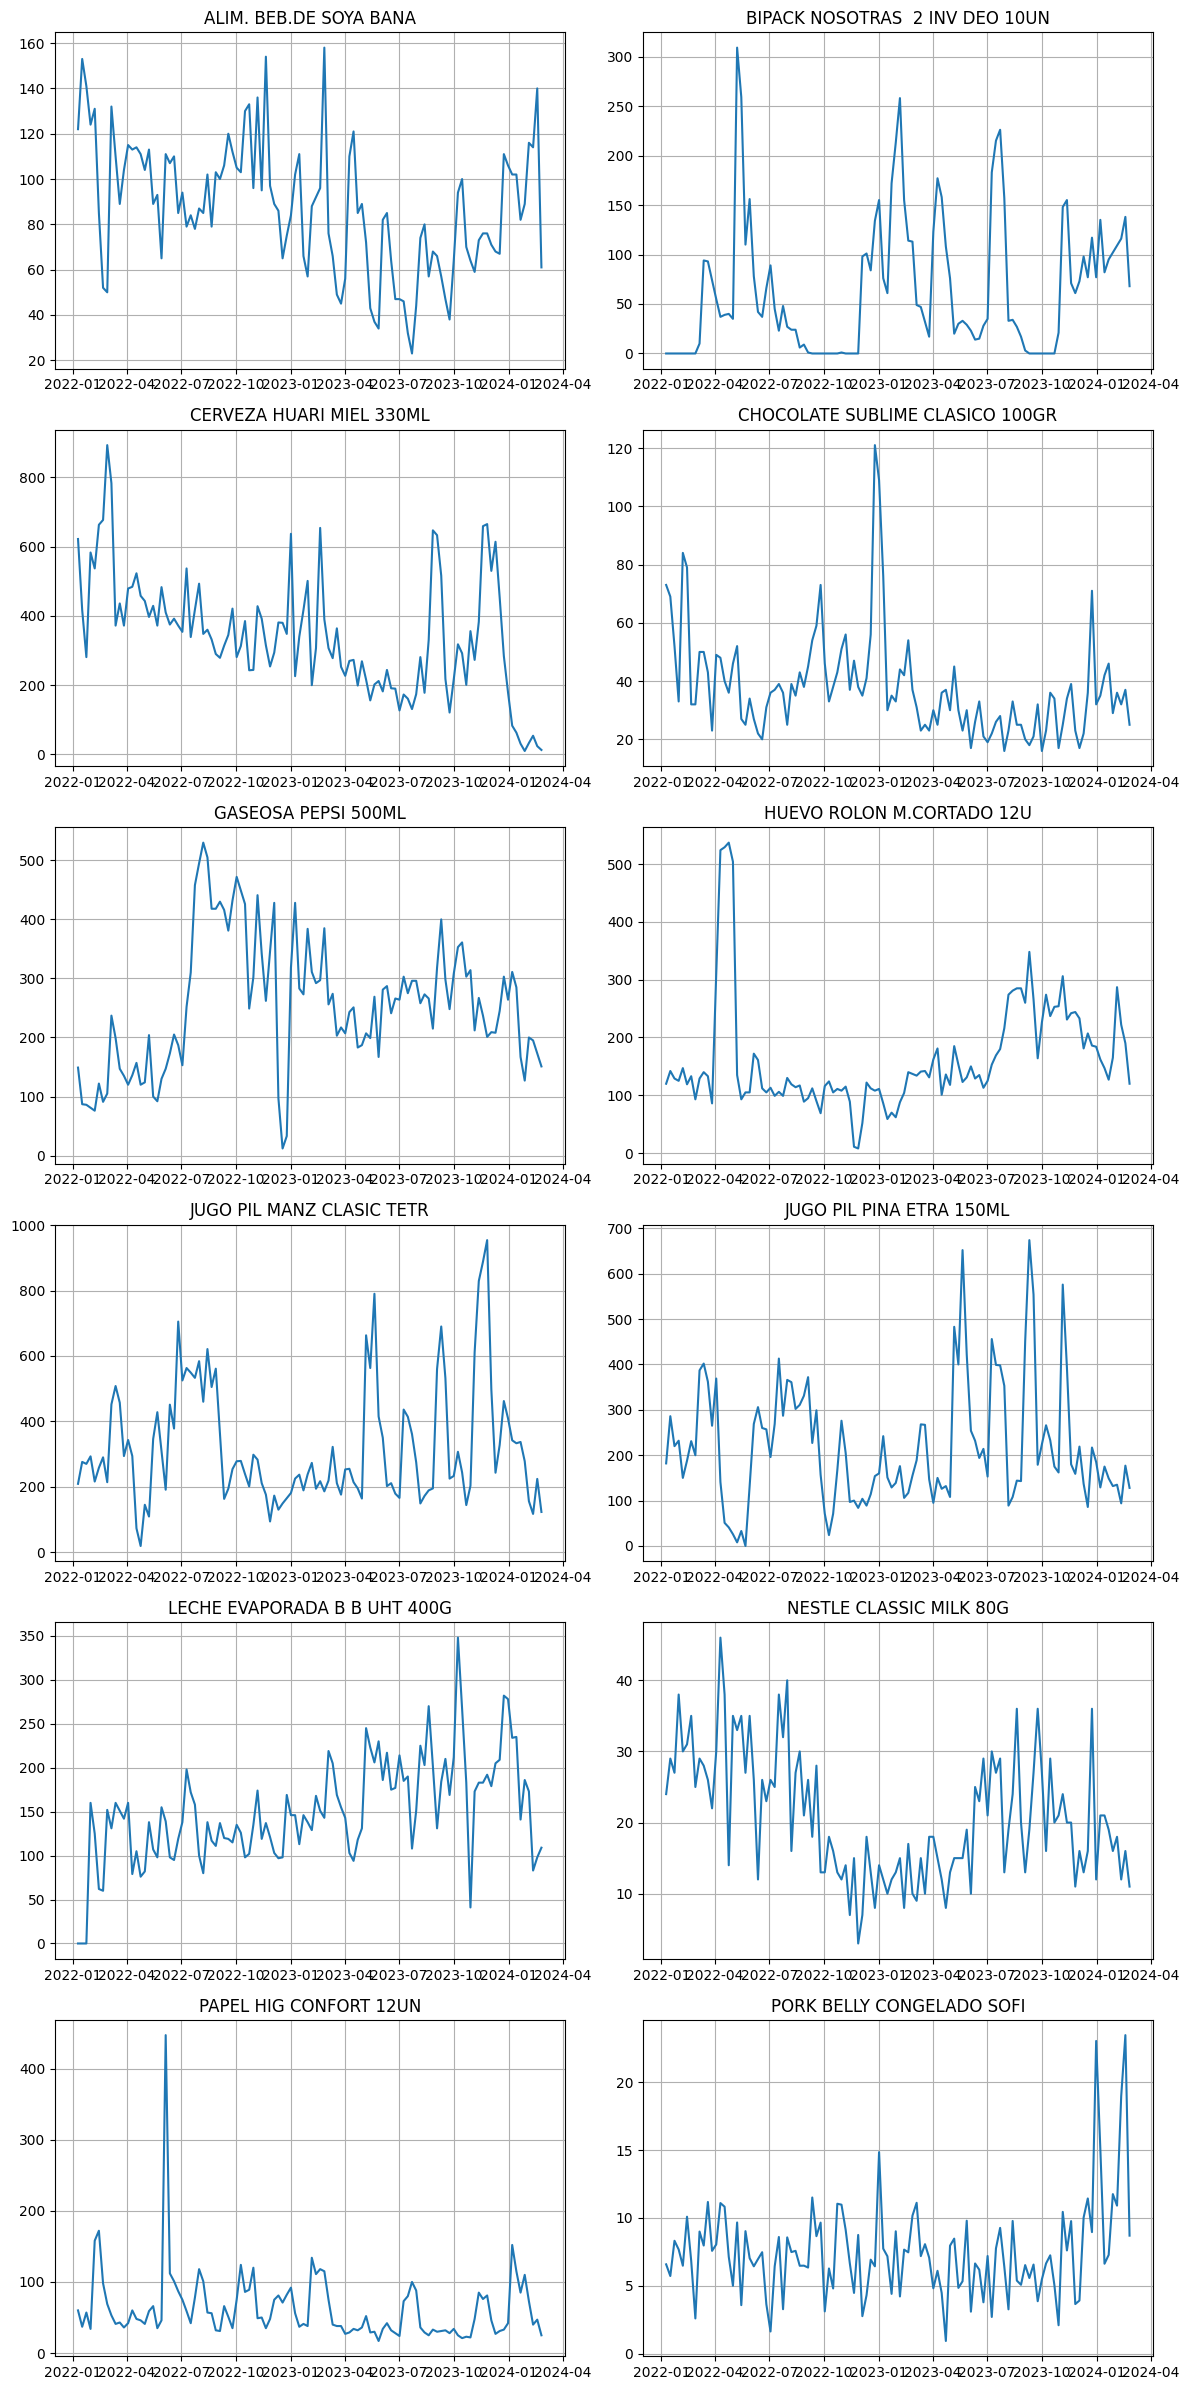

In [57]:
# 3.8 Plot trends on quantity, by product and week
df_quantity = df[['Descripcion','Cantidad_Vendida']].pivot_table(
    index=df.index,
    columns='Descripcion',
    values='Cantidad_Vendida',
    aggfunc='sum',
).resample('W', level=0).sum()

print('Cantidad de producto vendido, por semana')
fig, axs = plt.subplots(6,2, figsize=(12,24))
for i, ax in enumerate(axs.flatten()):
    ax.plot(df_quantity.iloc[:,i])
    ax.set_title(df_quantity.columns[i])
    ax.grid(True)
plt.tight_layout()
plt.show()

Ganancia por producto, por semana


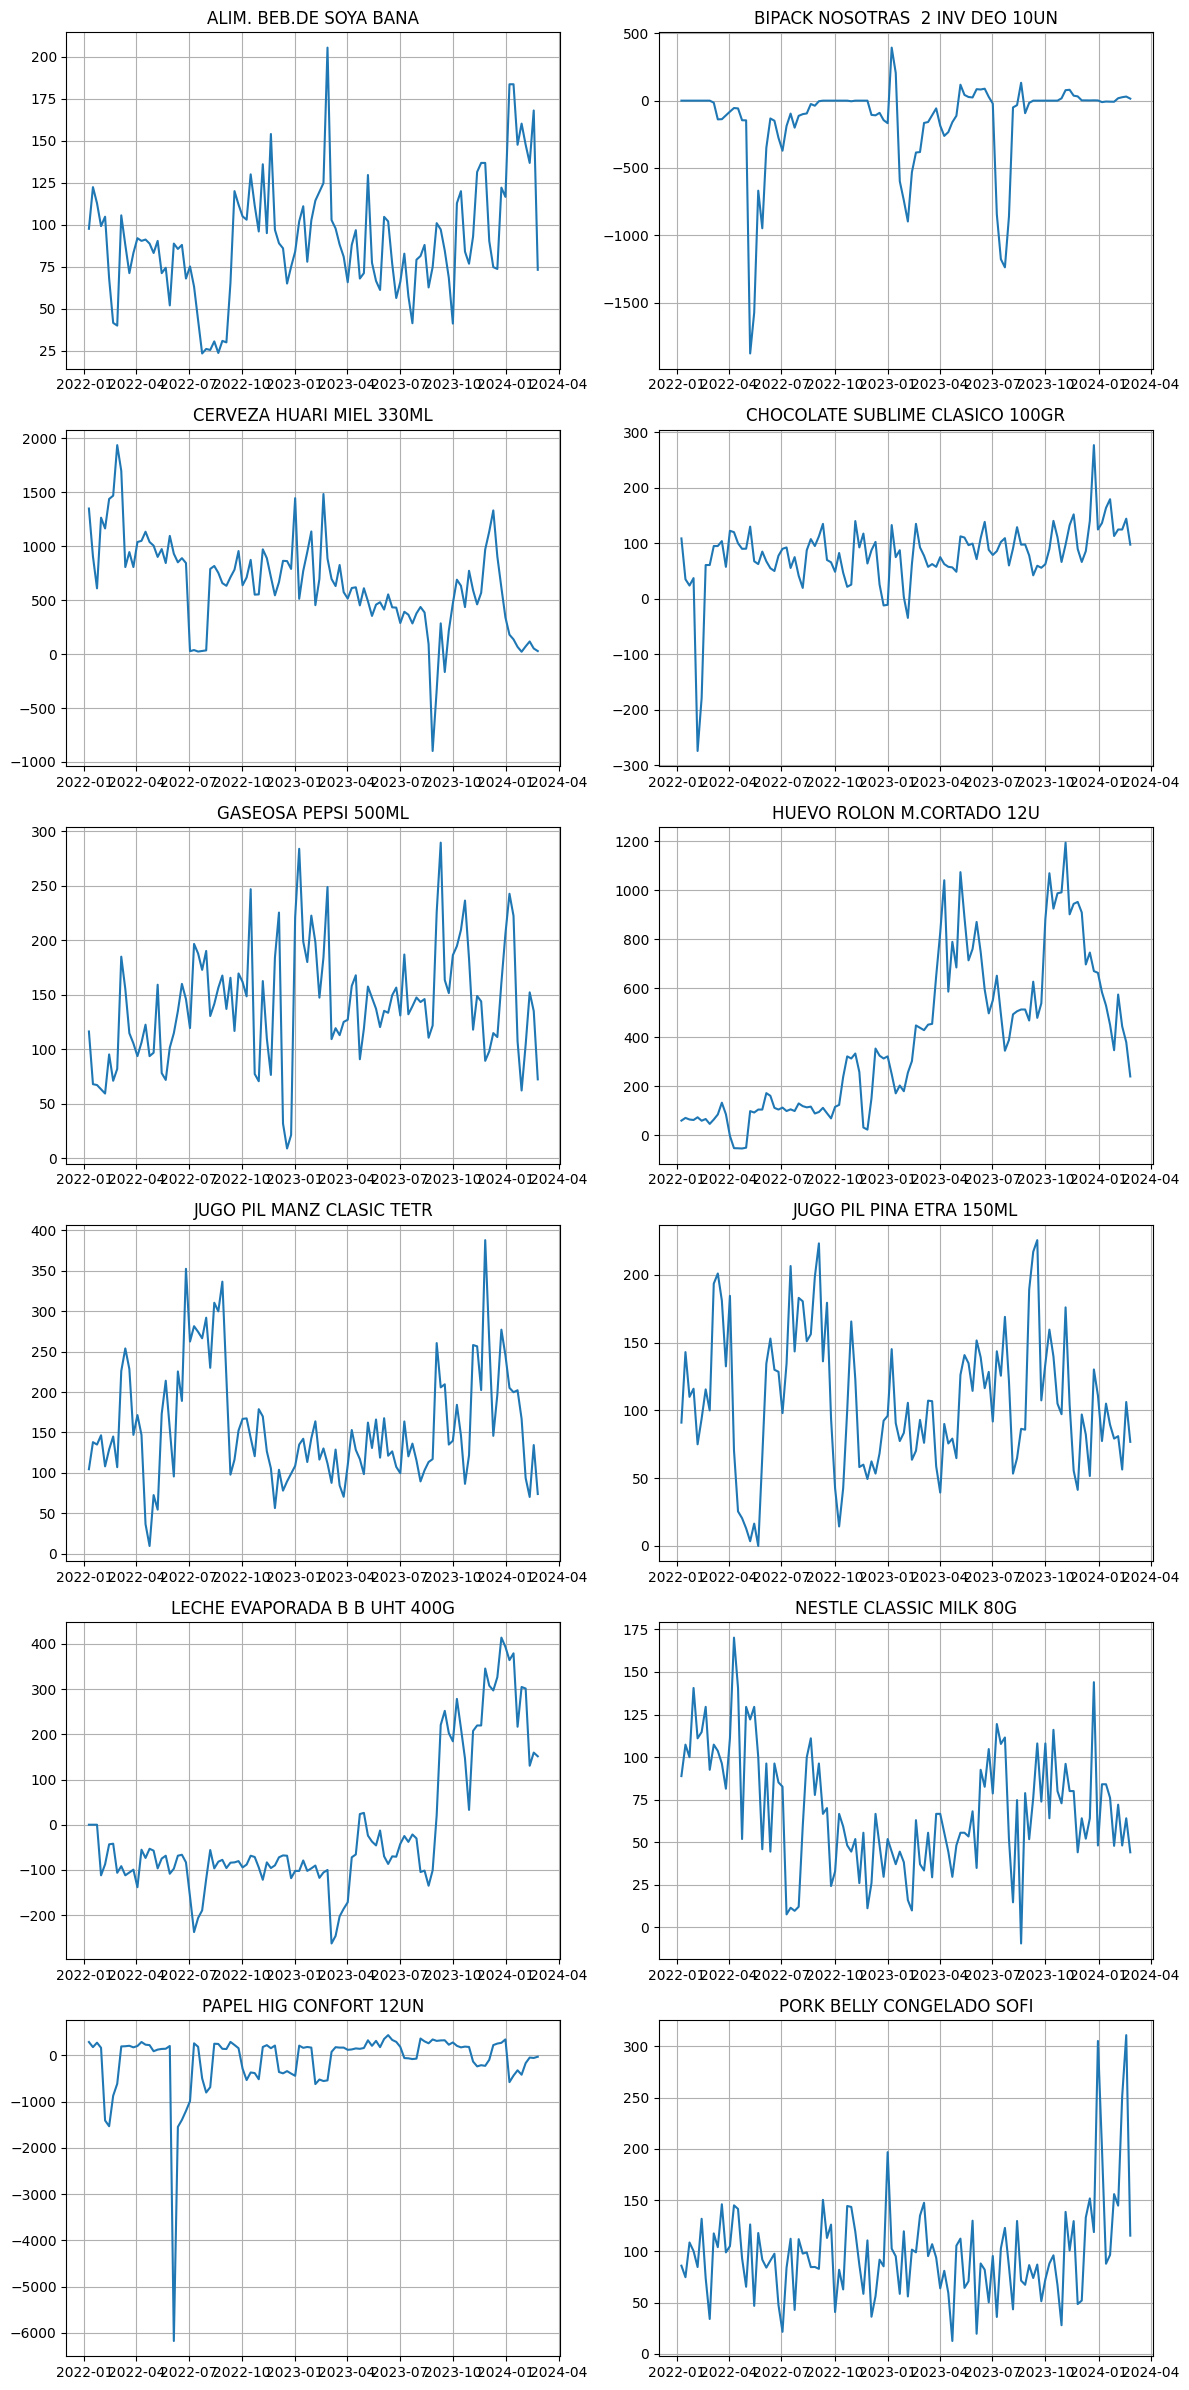

In [56]:
# 3.8 Plot trends on revenue, by product and week
df_revenue = df[['Descripcion','Ganancia']].pivot_table(
    index=df.index,
    columns='Descripcion',
    values='Ganancia',
    aggfunc='sum',
).resample('W', level=0).sum()

print('Ganancia por producto, por semana')

fig, axs = plt.subplots(6,2, figsize=(12,24))
for i, ax in enumerate(axs.flatten()):
    ax.plot(df_revenue.iloc[:,i])
    ax.set_title(df_revenue.columns[i])
    ax.grid(True)
plt.tight_layout()
plt.show()